In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.datasets import cifar10

(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
print(train_images.shape,train_labels.shape) # 50000,32,32,3 : rgb type , 50000,1
print(test_images.shape,test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


/Users/junho/tensorflow_macos_venv/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[6]')

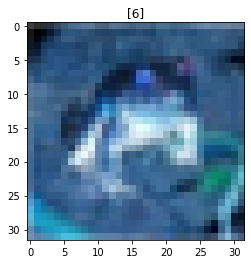

In [2]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(cv2.cvtColor(train_images[0],cv2.COLOR_BGR2RGB))
plt.title(train_labels[0])

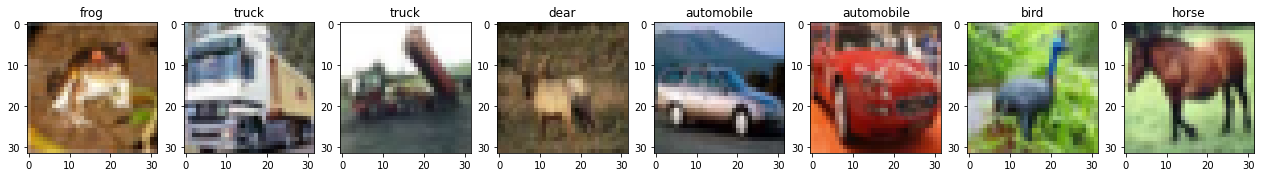

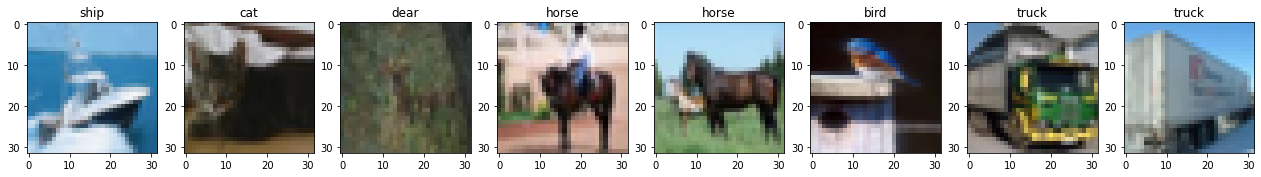

In [4]:
names = np.array(['airplane','automobile','bird','cat','dear','dogs',
                  'frog','horse','ship','truck'])
def show_images(images,labels,ncols=8):
    figure, axs = plt.subplots(figsize=(22,6),nrows=1,ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(names[int(label)])

show_images(train_images[:8],train_labels[:8],ncols=8)
show_images(train_images[8:16],train_labels[8:16],ncols=8)

In [6]:
# processing
# /255, one hot encoding
def processed_data(images,labels):
    images = np.array(images/255.0,dtype=np.float32)
    labels = np.array(labels,dtype=np.float32)
    return images,labels

train_images,train_labels = processed_data(train_images,train_labels)
test_images,test_labels = processed_data(test_images,test_labels)
train_images[0]

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0